Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, May 23, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np

np.lookfor('get array diagonal')

# Try other queries here
np.lookfor('mask array')
np.lookfor('filter array')
np.lookfor('sort array')

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.
Search results for 'mask array'
-------------------------------
numpy.putmask
    Changes elements of an array based on conditional and input values.
numpy.place
    Change elements of an array based on conditional and input values.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.ma.array
    An array class with possibly masked values.
numpy.ma.getmaskarray
    Return the mask of a masked array, or full boolean array of False.
numpy.mafromtxt
    Load ASCII data st

## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?


If V is a vectorspace over a field K and f: V --> V a linear mapping (matrix) of V into V ("endomorphism"), then $f(v) = \lambda v$ with $v \ne 0$ for the eigenvector v (and eigenvalue $\lambda$).

In general, one can state that eigenvectors are those vectors which directions are not changed when mapped by the matrix. The only thing that could change is the scale of those vectors, which could be length and orientation. The factor by which the scale changes is called "eigenvalue".

If a matrix has eigenvalue(s), those are the root(s) of the characteristic polynomial of that matrix. From these eigenvalues together with the matrix, one can calculate the eigenvectors.

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?


Given an n×n matrix A, the characteristic polynomial of A is the polynomial is defined as:

$$$$$${\displaystyle p_{A}(x)=\det \left(xE-A\right)}p_A(x) = \det \left(xE - A\right)$$$$$$

where, E = identity matrix and det is the determinant

The eigenvalues of the matrix A are the roots of the characteristic polynomial $\displaystyle p_{A}(x)$.

One can write down $\displaystyle p_{A}(x)$ in its factorization, using its roots ($\lambda$ of A).

The algebraic multiplicity of an eigenvalue is the power to which it devides $\displaystyle p_{A}(x)$, and the geometric multiplicity is the amount of linearly independent eigenvectors associated with the eigenvalue.

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

The spectrum of a matric is the set of its eigenvalues. The spectral theorem states when a matrix can be diagonilised. The spectral theorem also provides a canonical decomposition, called the eigendecomposition, of the underlying vector space on which the operator acts.

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [2]:
import scipy

m = np.matrix([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 42]])


# eig: returns:
# 1) The eigenvalues, each repeated according to its multiplicity. The eigenvalues are not
# necessarily ordered. The resulting array will be of complex type, unless the imaginary 
# part is zero in which case it will be cast to a real type. When a is real the resulting
# eigenvalues will be real (0 imaginary part) or occur in conjugate pairs
# 2) The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigen-
# vector corresponding to the eigenvalue w[i].
eigenvalues1 = np.linalg.eig(m)
# eigvals: returns:
# Only 1) of eig
eigenvalues2 = np.linalg.eigvals(m)

#from scipy
eigenvalues3 = scipy.linalg.eig(m)

eigenvalues1, eigenvalues2, eigenvalues3



AttributeError: module 'scipy' has no attribute 'linalg'

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.


Both point and cluster distance are used in ML as a similarity measure. Point distance measures the similarity (or dissimilarity) of two data vectors $\vec{x}$ and $\vec{y}$, whereas Cluster distance measures the similarity (or dissimilarity) of two clusters of data.

Point distance: There are different ways to measure the distance between two data vectors, for example Euclidian distance $d(\vec{x}, \vec{y})  =  ||\vec{x} – \vec{y}||  =  (\sum_{i=1…L} (x_i – y_i)^2)^{\frac{1}{2}}$

Cluster distance: For the cluster distance different measures can be used. The point distance is measured for certain points of the cluster (or the mean), depending on the measure.

Let X, Y be sets of data vectors, then the cluster distance measures can be:
1. Minimum distance: $D_{min}(X,Y)= min_{\vec{x}∈X,\vec{y}∈Y} d(\vec{x},\vec{y})$
2. Maximum distance: $D_{max}(X,Y)= max_{\vec{x}∈X,\vec{y}∈Y} d(\vec{x},\vec{y})$
3. Mean distance: Sum over all distances and take the mean
4. Centroid distance: Calculate the center of the clusters, by taking the mean value of all data of that cluster and then measure the point distance of the corresponding means

Examples:
point distance: a = (1,2) and b = (7,2) 

   --> euclidean: $d(a, b) = \sqrt((3-1)^2 + (2-2)^2) = 6$

cluster distance: A = {(1,2), (1,1), (0,2)} and B = {(7,2), (9,2), (8,1)} 
    
   --> d_min(A, B) = 6
   
   --> d_max(A, B) = 9
   
   --> ...

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.


1. Mean distance: $D_{mean}(X,Y) = 1/|X||Y|  \sum_{\vec{x}∈X,\vec{y}∈Y} d(\vec{x},\vec{y})$: For the mean distance the sum of all distances is divided by the number of distances, which means that the mean of all distances is calculated. Each distance between two points from the two clusters is taken into account separately.
2. Centroid distance: $D_{centroid}(X,Y) = d(1/|X| \sum_{\vec{x}∈X} \vec{x}, 1/|Y| \sum_{\vec{y}∈Y} \vec{y})$: For centroid distance first the mean of each of the clusters is taken and then the point distance of those two means is calculated.

The computational complexity for mean distance is $O(X*Y)$ and for centroid distance is $O(X+Y)$.

Formal requirements: For mean distance you only need the distances between the datapoints, in addition the centroid distance needs the numerical attribute values, because you need the the vector length for calculating the mean.

a) X = {1,2}, Y = {5,6}
* $D_{mean}(X,Y) = \frac{|1-5|+|1-6|+|2-5|+|2-6|}{2*2} = \frac{4+5+3+4}{4} = 4$
* $D_{centroid}(X,Y) = d(\frac{1+2}{2}, \frac{5+6}{2}) = d(1.5, 5.5) = |1.5-5.5| = 4$


b) X = {(2,2), (3,2)}, Y = {(9,2), (10,2), (9,5)}

* $D_{mean} = \frac{\sum d(\vec{x},\vec{y})}{|X||Y|} = \frac{\sqrt{7^2}+\sqrt{8^2}+\sqrt{7^2 + 3^2}+\sqrt{6^2}+\sqrt{7^2}+\sqrt{6^2 + 3^2}}{2*3} = 7.054$

* $D_{centroid} = d(\frac{\sum \vec{x}}{|X|}, \frac{\sum \vec{y}}{|Y|}) = d(\frac{(5,4)}{2}, \frac{(28,9)}{3}) = \sqrt{6.833^2 + 1^2} = 6.906$

### c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [3]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    # YOUR CODE HERE
    # For each of the x (cluster1) vectors take each of the y (cluster2) vectors and compute 
    # the distance
    result = []
    for vec in cluster1:
        result.append(cdist([vec], cluster2, 'euclidean'))
    # Compute the mean of all the distances
    return np.mean(result)
    

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])
print(cdist(x,y, 'euclidean'))

assert np.round(d_mean(x, y), 3) == 22.297, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

[[20.78460969 25.98076211 31.17691454 43.23193264 10.77032961]
 [15.58845727 20.78460969 25.98076211 40.32369031  7.68114575]
 [10.39230485 15.58845727 20.78460969 37.90778284  7.48331477]]


In [4]:
DEBUG = False

def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    if DEBUG:
        print([cluster1.mean(axis=0)])
        print([cluster2.mean(axis=0)])
        print(cdist([cluster1.mean(axis=0)], [cluster2.mean(axis=0)], 'euclidean'))
    # Calculate the means of each of the clusters first, then calculate the distance
    return cdist([cluster1.mean(axis=0)], [cluster2.mean(axis=0)], 'euclidean')
    

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])
if DEBUG:
    print([cdist([x[i]],[x[j]], 'euclidean') for i in range(len(x)) for j in range(i+1, len(x))])
    print(x.mean(axis = 0))

assert np.round(d_centroid(x, y), 3) == 20.785, "Result is not correct: {}".format(d_centroid(x, y))
assert np.round(d_centroid(z, w), 3) == 55.069, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

###### YOUR ANSWER HERE
1.0) number of alternatives: $\binom{N}{k} = \binom{5}{2} = 10$

1.1) smallest distance: a and b --> first cluster

1.2 update distances to the other points by averaging (mean cluster distance):
- $d((a,b), c) = \frac{1}{2} (d(a,c)+d(b,c)) = \frac{1}{2} (6+5) = 5.5$
- $d((a,b), d) = \frac{1}{2} (d(a,d)+d(b,d)) = \frac{1}{2} (10+9) = 9.5$
- $d((a,b), e) = \frac{1}{2} (d(a,e)+d(b,e)) = \frac{1}{2} (9+8) = 8.5$

1.3 new distance matrix:

|       |  a,b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|
| **a,b** |  0  |  5.5  |  9.5 |  8.5  |
| **c** |  5.5  |  0  |  4  |  5  |
| **d** |  9.5 |  4  |  0  |  3  |
| **e** |  8.5  |  5  |  3  |  0  |

2.0 number of alternatives: $\binom{N}{k} = \binom{4}{2} = 6$

2.1 smallest distance: d and e --> second cluster

2.2 update the distances to the other points by averaging:
- $d((a,b), (d,e)) = \frac{1}{2} (d((a,b),d)+d((a,b),e)) = \frac{1}{2} (9.5+8.5) = 9$
- $d((d,e), c) = \frac{1}{2} (d(d,c)+d(e,c)) = \frac{1}{2} (4+5) = 4.5$

2.3 new distance matrix:

|       |  a,b  |  c  |  d,e  |
|-------|-----|-----|-----|
| **a,b** |  0  |  5.5  |  9 |
| **c** |  5.5  |  0  |  4.5  |
| **d, e** |  9 |  4.5  |  0  |

3.0 number of alternatives: $\binom{N}{k} = \binom{3}{2} = 3$

3.1 smallest distance: c and (d,e) --> second cluster

3.2 update the distances to the other points  by averaging:
- $d((a,b), (c,d,e)) = \frac{1}{2} (d((a,b),c)+d((a,b),(d,e))) = \frac{1}{2} (5.5+9) = 7.25$

3.3 new matrix:

|       |  a,b  |  c,d,e  |
|-------|-----|-----|
| **a,b** |  0  |  7.25  |
| **c,d,e** |  7.25  |  0  |


### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.


|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |

There could be $2^{k-1}-1 = 2^4-1 = 15$ different possibilities to split the original cluster. 
(1. a, others; 2. b, others, ..., 6. (a,b), others, 7. (a,c), others, ...)

As a stategy, we could look for the highest difference and divide the dataset into subclusters where we split up one singleton cluster with the biggest difference accordingly. In the end we would have a lot of singleton clusters with the highest difference and then the rest of data.

Strategy: polythetic divisive method:

1. start with all the points in one cluster
2. Split the first point from the cluster. This point is the one which has the largest mean distance to all the other points.
3. Calculate the mean distances of each point in the remaining main cluster,
    - firstly, to the points in the main cluster (so, its own cluster)
    - secondly, to the points in the splinter cluster
4. Calculate the difference between the first and the second mean for each point.
5. Add the point with the largest difference (if positive) to the splinter cluster.
6. Repeat 3.-5. with the adjusted clusters and means,
    until all differences in 4 are negative. 
7. Restart with 1. for the resulting subclusters, each.

For our example:

|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |

1. cluster: (a,b,c,d,e)
2. mean distances to all other points:
    - a) 27/5 --> highest average distance --> split up
    - b) 24/5
    - c) 20/5
    - d) 26/5
    - e) 25/5
3. and 4. mean distances of each point in the remaining cluster:

|       |  1. to main  |  2. to (a)  |  1.-2.  |
|-------|-----|-----|-----|
| **b** |  12/3  |  2  |  6/3  | 
| **c** |  14/3  |  6  |  -4/3  |
| **d** |  16/3 |  10  |  -14/3  |
| **e** |  16/3  |  9  |  -11/3  |

5. new clusters: (a,b) and (c,d,e)
6. next loop:

    3 . and 4. mean distances:
    
|       |  1. to main  |  2. to (a,b)  |  1.-2.  |
|-------|-----|-----|-----| 
| **c** |  9/2  |  11/2  |  -1  |
| **d** |  7/2 |  19/2  |  -6  |
| **e** |  8/2  |  17/2  |  -9/2  |
    
    5. As all differences are negative, we don't split the two any further.
7. We could now restart iterating over the points of one of those clusters or stick to the two seperated clusters as a result.

resulting clusters: (a,b), (c,d,e)

### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [5]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

[ 10  48  62 107 118]


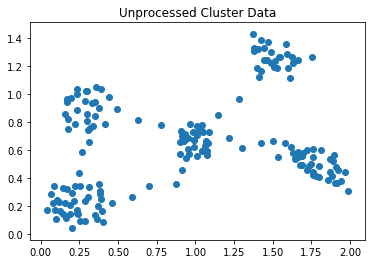

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()

print(np.unique(labels))

# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()

# Test different parameters above
# YOR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

In the single- and complete-linkage clustering different distance measures are used. The single linkage clustering employs the min distance measure, the complete linkage clustering the max distance measure. So when you merge two clusters, to calculate the remaining distances, you pick the maxium distance of the clusters you just merged with the rest of the clusters.

Points: In the sample data the complete-linkage clustering seems more accurate. The problem with this dataset occurs in single-linkage clustering, because the distance to any of the other points (yellow) is the highest, so it is never chosen to one of the clusters.

ClusterData: Single-linkage might be a better choice here, because with higher k-values in this data set maybe you *want* this effect that points that are farther away belong to a small cluster.

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements?

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def pnorm(x, p):
    """
    Calculates the p-norm of x.

    Args:
        x (array): the vector for which the norm is to be computed.
        p (float): the p-value (a positive real number).

    Returns:
        The p-norm of x.
    """
    result = None
    # loop over each component of the vector
    inner_sum = 0
    if isinstance(x, (int, np.integer)) or isinstance(x, (float, np.floating)):
        # calculate the abs of x
        extension = np.abs(x)**p
        # abs of x to the power of p
        # return x to the power of (1/p)
        result = extension**(1/p)
    else:
        # so, if x is not an int
        for x_i in x:
            # calculate the abs of the component
            extension = np.abs(x_i)**p
            # abs of the component to the power of p
            # sum over all components
            inner_sum += extension
            # return the sum to the power of (1/p)
            result = inner_sum**(1/p)

    return result


def pdist(x0, x1, p=2):
    """
    Calculates the distance between x0 and x1
    using the p-norm.

    Arguments:
        x0 (array): the first vector.
        x1 (array): the second vector.
        p (float): the p-value (a positive real number).

    Returns:
        The p-distance between x0 and x1.
    """
    result = None
    # YOUR CODE HERE
    # difference between vectors
    difference_vector = []
    if isinstance(x0, (int, np.integer)) or isinstance(x0, (float, np.floating)):
        difference_vector = np.abs(x0-x1)
    else:
        for x0_i,x1_i in zip(x0, x1):
            difference_vector.append(np.abs(x0_i-x1_i))
    # p-norm of difference
    result = pnorm(difference_vector,p)
    return result



def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """
    # the dimensions of the data and the vectors needed
    dimensions:int = data[0].size
    #  get the boundaries for the vectors
    # boundaries:list = []
    # We will only need the t-th(1) and (t-1)-th(0) set of vectors
    K_vecs0 = np.zeros((k, dimensions))
    K_vecs1 = np.zeros((k, dimensions))
    epsilon = 0.0001
    for d in range(dimensions):
        # fill the W_t(0)s
        lowest = min(data[:,d])
        highest = max(data[:,d])
        # boundaries.append([lowest, highest])
        n_column = np.random.uniform(low=lowest, high=highest, size=k)
        n_column = np.array(n_column)
        # if d == 0:
        K_vecs1[:,d] += n_column
        # else:
            # np.hstack((K_vecs1, n_column))
    labels:str = []
    while(True):
        # initialize the  labels
        labels = []
        # Initialize our set of clusters
        K_clusters:list = []
        for d in range(k):
            # Initialize the clusters
            K_clusters.append(None)
        # assign each data point to the closest cluster to itself
        for x_i in data[:]:
            closest_Kluster:int = 0
            min_distance:np.array = pdist(x_i,K_vecs1[0])
            # find the closest cluster to the data point
            for k_vec_i, vec in enumerate(K_vecs1.tolist()):
                # ignore the first index
                if k_vec_i == 0:
                    continue
                dist = pdist(x_i, vec)
                if dist < min_distance:
                    min_distance = dist
                    closest_Kluster = k_vec_i
            if None != K_clusters[closest_Kluster]:
                K_clusters[closest_Kluster].append(x_i)
            else:
                K_clusters[closest_Kluster] = [x_i]
            #  Add the label  to the data point
            labels.append(closest_Kluster)

        K_clusters = np.array(K_clusters)
        # t++
        K_vecs0[:] = K_vecs1[:]
        # Update our W_k()s
        for index, k in enumerate(K_clusters.tolist()):
            # Not all clusters might have changed
            if k != None:
                # Assign the  centroids fo the clusters
                K_vecs1[index] = np.mean(k)
        # If at least one of the clusters changed, repeat all
        for t0, t1 in zip(K_vecs0[:], K_vecs1[:]):
            if pdist(t0, t1) > epsilon:
                continue
        # else we are done
        break
    centroids = K_vecs1
    return labels, centroids

In [10]:
data = np.loadtxt('clusterData.txt')


# Test different ks here
# YOUR CODE HERE
for k in [3, 7]:
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()

TypeError: object of type 'int' has no len()

### b) Why might the clustering for k=7 not look optimal? 

Assigning k with higher values might like k=7, might lead to overclustering the data.